In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [3]:
dataBase_path = r'./'
dataBase_file = r'UUVPerformance.xlsx'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
convDF = pd.read_excel(data_path, sheet_name = 'Propeller')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

In [5]:
conv_cot = convDF[convDF['COTopt [J/m]'].notnull()]
bcf_cot = bcfDF[bcfDF['COTopt [J/m]'].notnull()]
mpf_cot = mpfDF[mpfDF['COTopt [J/m]'].notnull()]
lift_cot = liftDF[liftDF['COTopt [J/m]'].notnull()]

# sort the column values in ascending order
conv_cot = conv_cot.sort_values('Locomotion')
bcf_cot = bcf_cot.sort_values('Locomotion')
mpf_cot = mpf_cot.sort_values('Locomotion')
lift_cot = lift_cot.sort_values('Locomotion')

In [6]:
conv_names = conv_cot['Name'].unique()
bcf_names = bcf_cot['Name'].unique()
mpf_names = mpf_cot['Name'].unique()
lift_names = lift_cot['Name'].unique()

conv_dfs = [conv_cot[conv_cot['Name']==name] for name in conv_names]
bcf_dfs = [bcf_cot[bcf_cot['Name']==name] for name in bcf_names]
mpf_dfs = [mpf_cot[mpf_cot['Name']==name] for name in mpf_names]
lift_dfs = [lift_cot[lift_cot['Name']==name] for name in lift_names]

(500.0, 20000000.0)

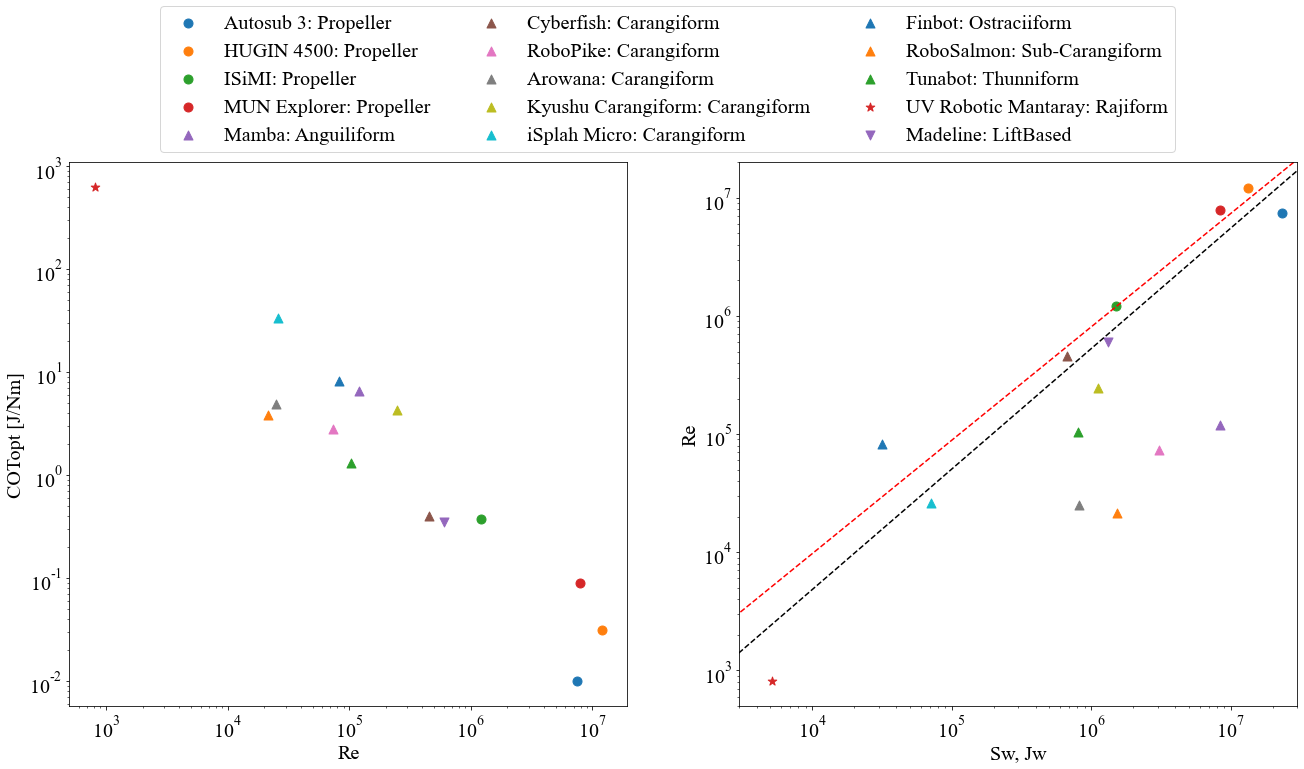

In [7]:
fig1, axs = plt.subplots(1, 2, figsize=(22,10), facecolor='w')
axs.flatten()

for auv in conv_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='o', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Jw'].values[0], auv['Re'].values[0], marker='o', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in bcf_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='^', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='^', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in mpf_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='*', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='*', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in lift_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='v', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='v', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

dx = np.linspace(1e3, 3e7, 100)
Re_low = 0.03*dx**1.31
Re_high = 0.4*dx**1.02

#axs[1].plot(dx, 0.03*dx**1.31, 'k-')
axs[1].plot(dx, 0.4*dx**1.02, 'k--')
axs[1].plot(dx, 1.4*dx**0.96, 'r--')

axs[0].set_xlabel('Re')
axs[0].set_ylabel('COTopt [J/Nm]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(ncol=3, loc=4, bbox_to_anchor=(2.0, 1.00))

axs[1].set_xlabel('Sw, Jw')
axs[1].set_ylabel('Re')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim([3e3, 3e7])
axs[1].set_ylim([5e2, 2e7])